# **INSTALLING ALL THE REQUIRED LIBRARIES**

In [0]:
!pip install easyocr

In [0]:
!pip install imutils

# IMPORTING ALL THE REQUIRED LIBRARIES

In [0]:
import cv2

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
import imutils 

In [0]:
import easyocr

# Reading the Image

In [0]:
img = cv2.imread('test.jpg')
print(img)

[[[ 77  47  28]
  [ 74  44  25]
  [ 75  45  26]
  ...
  [217 193 171]
  [203 171 142]
  [186 144 109]]
 [[ 72  45  24]
  [ 74  45  24]
  [ 73  44  23]
  ...
  [195 161 132]
  [165 126  94]
  [103  69  39]]
 [[ 70  44  20]
  [ 71  44  23]
  [ 74  44  25]
  ...
  [129  89  60]
  [ 80  53  26]
  [ 71  44  17]]
 ...
 [[ 35  21  15]
  [ 36  23  15]
  [ 39  26  18]
  ...
  [ 30  18  12]
  [ 30  18  12]
  [ 26  17  13]]
 [[ 18  13  12]
  [ 17  12  11]
  [ 18  13  12]
  ...
  [ 23  21  21]
  [ 21  16  17]
  [ 20  18  18]]
 [[ 26  24  23]
  [ 25  23  22]
  [ 24  22  21]
  ...
  [ 37  35  34]
  [ 42  39  35]
  [ 41  36  33]]]


# Converting the Image into the GRAY Scale FORMAT

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

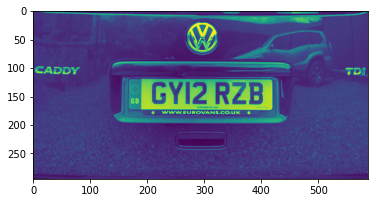

In [0]:
plt.imshow(gray)

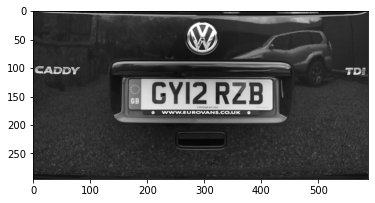

In [0]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# APPLYING FILTERING TO REMOVE THE NOISE FROM THE IMAGE, ALONG WITH THE EDGE DETECTION, WHICH ENABLES US TO FIND EDGES WITH IN THE IMAGE

In [0]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [0]:
edged = cv2.Canny(bfilter, 30, 200)

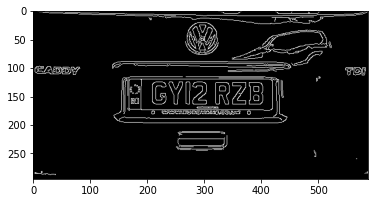

In [0]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [0]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [0]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [0]:
print(contours)

[array([[[171, 119]],
       [[170, 120]],
       [[169, 120]],
       [[168, 121]],
       [[168, 171]],
       [[169, 172]],
       [[168, 173]],
       [[167, 173]],
       [[166, 172]],
       [[166, 170]],
       [[166, 172]],
       [[168, 174]],
       [[169, 174]],
       [[168, 173]],
       [[169, 172]],
       [[189, 172]],
       [[190, 173]],
       [[404, 173]],
       [[405, 174]],
       [[415, 174]],
       [[416, 173]],
       [[418, 173]],
       [[420, 171]],
       [[420, 122]],
       [[418, 120]],
       [[415, 120]],
       [[414, 119]]], dtype=int32), array([[[190, 120]],
       [[191, 119]],
       [[414, 119]],
       [[415, 120]],
       [[417, 120]],
       [[420, 123]],
       [[420, 170]],
       [[417, 173]],
       [[416, 173]],
       [[415, 174]],
       [[405, 174]],
       [[404, 173]],
       [[191, 173]],
       [[189, 171]],
       [[189, 132]],
       [[190, 131]]], dtype=int32), array([[[154,  88]],
       [[153,  89]],
       [[148,  89]],
   

In [0]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [0]:
print(location)

[[[168 121]]
 [[168 174]]
 [[420 171]]
 [[414 119]]]


In [0]:
mask = np.zeros(gray.shape, np.uint8)

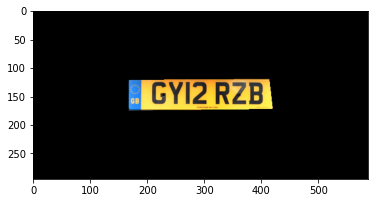

In [0]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [0]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

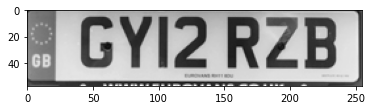

In [0]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [0]:
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
[([[36, 0], [244, 0], [244, 54], [36, 54]], 'GYI2 RZB', 0.9281694881292722)]


In [0]:
print(result[0][0])

[[36, 0], [244, 0], [244, 54], [36, 54]]


In [0]:
print(result[0][1])

GYI2 RZB


In [0]:
text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [0]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)

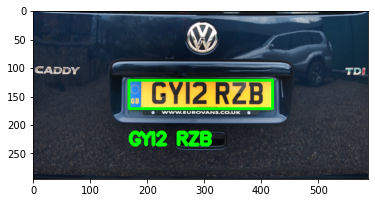

In [0]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))